<a href="https://colab.research.google.com/github/sharanibiruda/Attendance_predition/blob/main/AdmissionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from google.colab import files
uploaded=files.upload()


Saving Admission_Predict.csv to Admission_Predict.csv


In [5]:
import io
dataset=pd.read_csv(io.BytesIO(uploaded['Admission_Predict.csv']))


In [6]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
updated_dataset=dataset.iloc[:,1:9]
updated_dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
print(updated_dataset.shape)
updated_dataset.describe()


(400, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
updated_dataset.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
updated_dataset.corr(method="pearson")

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


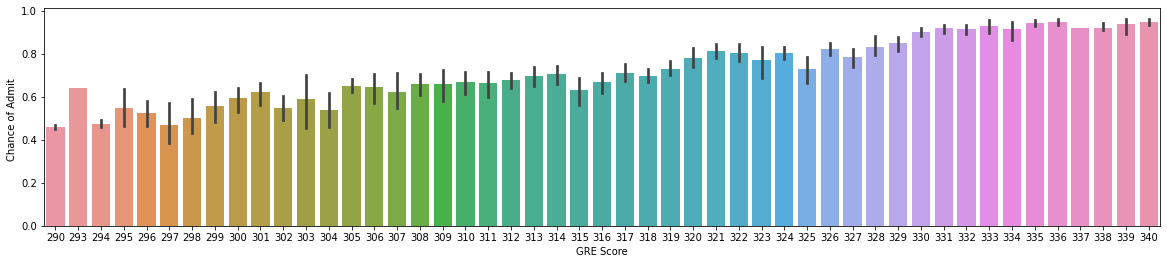

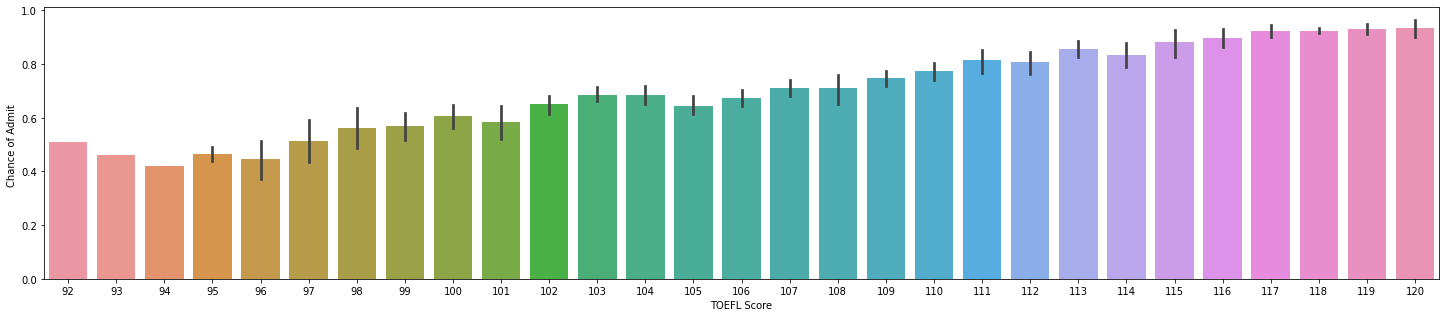

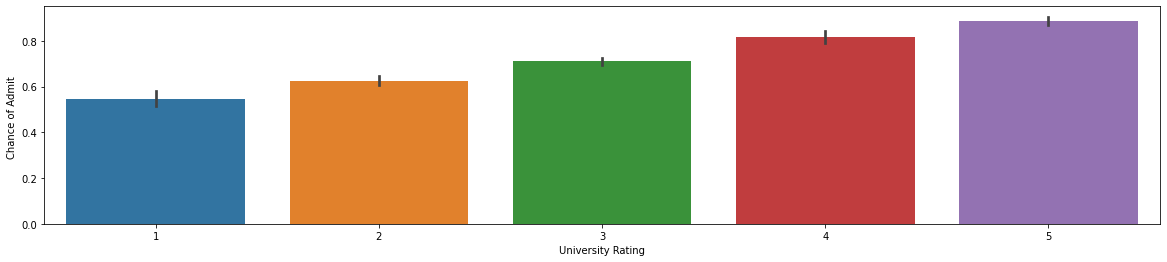

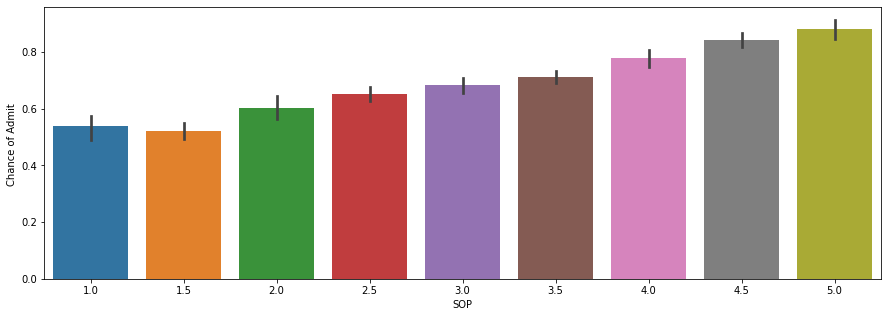

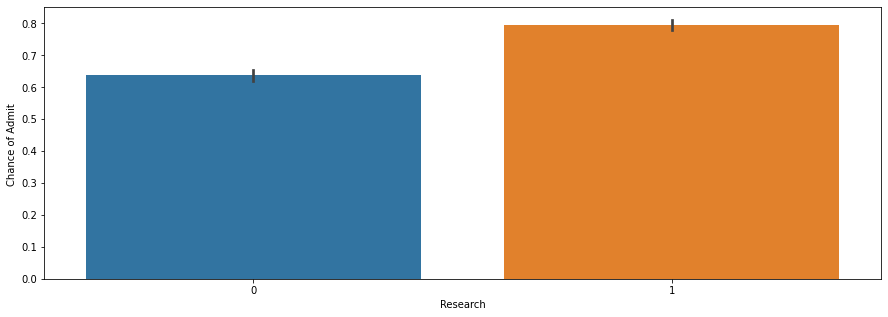

In [11]:
plt.subplots(figsize=(20,4))
sns.barplot(x="GRE Score",y="Chance of Admit ",data=dataset)
plt.subplots(figsize=(25,5))
sns.barplot(x="TOEFL Score",y="Chance of Admit ",data=dataset)
plt.subplots(figsize=(20,4))
sns.barplot(x="University Rating",y="Chance of Admit ",data=dataset)
plt.subplots(figsize=(15,5))
sns.barplot(x="SOP",y="Chance of Admit ",data=dataset)
#plt.subplots(figsize=(15,4))
#sns.barplot(x="CGPA",y="Chance of Admit ",data=dataset)
plt.subplots(figsize=(15,5))
sns.barplot(x="Research",y="Chance of Admit ",data=dataset)

In [12]:
X=updated_dataset.iloc[:,:7]
y=updated_dataset["Chance of Admit "]



In [13]:
print(X.shape)
print(y.shape)
X.head()

(400, 7)
(400,)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [15]:
from sklearn.linear_model import LinearRegression
#Linear Regression
Linear=LinearRegression()
Linear.fit(X_train,y_train)
y_pred=Linear.predict(X_test)
y_pred

array([0.66816926, 0.63624273, 0.73122214, 0.91807932, 0.65866257,
       0.77019932, 0.67465277, 0.85075008, 0.8370863 , 0.80042174,
       0.48056318, 0.66584472, 0.68620325, 0.61657599, 0.53355645,
       0.57336479, 0.49646167, 0.82307466, 0.62536007, 0.69933237,
       0.9672319 , 0.85839996, 0.86003093, 0.90411493, 0.62206212,
       0.69831889, 0.64005358, 0.89966116, 0.80355934, 0.75630733,
       0.90994904, 0.84070293, 0.59694903, 0.72751722, 0.71782846,
       0.60565153, 0.59822195, 0.7088992 , 0.7832538 , 0.69810586,
       0.93723918, 0.6595092 , 0.9532787 , 0.69738735, 0.68455438,
       0.64827778, 0.65447539, 0.88099392, 0.95172157, 0.5197848 ,
       0.46257415, 0.54745506, 0.79195137, 0.7259337 , 0.66500139,
       0.65254347, 0.93792857, 0.74138918, 0.8814558 , 0.9516664 ,
       0.67482617, 0.76304487, 0.80814566, 0.85859395, 0.52140877,
       0.70155389, 0.90570557, 0.72509137, 0.71805487, 0.73638729,
       0.76734751, 0.74163439, 0.73350435, 0.82704031, 0.66160

In [17]:
from sklearn.metrics import mean_absolute_error,r2_score
print("R2 score of the model is ",r2_score(y_pred,y_test))
print("mean_absolute_error  of the model is ",mean_absolute_error(y_pred,y_test))


R2 score of the model is  0.6816863553976766
mean_absolute_error  of the model is  0.04913671196926681
